In [1]:
import dgl.nn as dglnn
from dgl import from_networkx
import torch.nn as nn
import torch as th
import torch.nn.functional as F
import dgl.function as fn
import networkx as nx
import pandas as pd
import socket
import struct
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\91739\S8_Project\NF-BoT-IoT.csv")

In [4]:
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.100.6,52670,192.168.100.1,53,17,5.212,71,126,1,1,0,4294966,0,Benign
1,192.168.100.6,49160,192.168.100.149,4444,6,0.000,217753000,199100,4521,4049,24,4176249,1,Theft
2,192.168.100.46,3456,192.168.100.5,80,17,0.000,8508021,8918372,9086,9086,0,4175916,0,Benign
3,192.168.100.3,80,192.168.100.55,8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0,Benign
4,192.168.100.46,80,192.168.100.5,80,6,7.000,8374706,0,9086,0,0,4175916,0,Benign


In [5]:
data['IPV4_SRC_ADDR'] = data.IPV4_SRC_ADDR.apply(lambda x: socket.inet_ntoa(struct.pack('>I', random.randint(0xac100001, 0xac1f0001))))

In [6]:
data['IPV4_SRC_ADDR'] = data.IPV4_SRC_ADDR.apply(str)
data['L4_SRC_PORT'] = data.L4_SRC_PORT.apply(str)
data['IPV4_DST_ADDR'] = data.IPV4_DST_ADDR.apply(str)
data['L4_DST_PORT'] = data.L4_DST_PORT.apply(str)

In [7]:
data['IPV4_SRC_ADDR'] = data['IPV4_SRC_ADDR'] + ':' + data['L4_SRC_PORT']
data['IPV4_DST_ADDR'] = data['IPV4_DST_ADDR'] + ':' + data['L4_DST_PORT']

In [8]:
data.drop(columns=['L4_SRC_PORT','L4_DST_PORT'],inplace=True)

In [10]:
data.head()

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.17.245.209:52670,192.168.100.1:53,17,5.212,71,126,1,1,0,4294966,0,Benign
1,172.18.60.126:49160,192.168.100.149:4444,6,0.000,217753000,199100,4521,4049,24,4176249,1,Theft
2,172.21.164.215:3456,192.168.100.5:80,17,0.000,8508021,8918372,9086,9086,0,4175916,0,Benign
3,172.18.204.156:80,192.168.100.55:8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0,Benign
4,172.22.134.77:80,192.168.100.5:80,6,7.000,8374706,0,9086,0,0,4175916,0,Benign


In [11]:
data.drop(columns=['Label'],inplace = True)

In [12]:
data.rename(columns={"Attack": "label"},inplace = True)

In [13]:
data.head()

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
0,172.17.245.209:52670,192.168.100.1:53,17,5.212,71,126,1,1,0,4294966,Benign
1,172.18.60.126:49160,192.168.100.149:4444,6,0.000,217753000,199100,4521,4049,24,4176249,Theft
2,172.21.164.215:3456,192.168.100.5:80,17,0.000,8508021,8918372,9086,9086,0,4175916,Benign
3,172.18.204.156:80,192.168.100.55:8080,6,7.000,8442138,9013406,9086,9086,0,4175916,Benign
4,172.22.134.77:80,192.168.100.5:80,6,7.000,8374706,0,9086,0,0,4175916,Benign


In [14]:
le = LabelEncoder()
le.fit_transform(data.label.values)
data['label'] = le.transform(data['label'])

In [15]:
label = data.label

In [16]:
data.drop(columns=['label'],inplace = True)

In [17]:
scaler = StandardScaler()

In [18]:
data =  pd.concat([data, label], axis=1)

In [20]:
data.head()

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
0,172.17.245.209:52670,192.168.100.1:53,17,5.212,71,126,1,1,0,4294966,0
1,172.18.60.126:49160,192.168.100.149:4444,6,0.000,217753000,199100,4521,4049,24,4176249,4
2,172.21.164.215:3456,192.168.100.5:80,17,0.000,8508021,8918372,9086,9086,0,4175916,0
3,172.18.204.156:80,192.168.100.55:8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0
4,172.22.134.77:80,192.168.100.5:80,6,7.000,8374706,0,9086,0,0,4175916,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
     data, label, test_size=0.3, random_state=123,stratify= label)

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode each of the specified columns
X_train['TCP_FLAGS'] = label_encoder.fit_transform(X_train['TCP_FLAGS'])
X_train['L7_PROTO'] = label_encoder.fit_transform(X_train['L7_PROTO'])
X_train['PROTOCOL'] = label_encoder.fit_transform(X_train['PROTOCOL'])


In [23]:
cols_to_norm = list(set(list(X_train.iloc[:, 2:].columns ))  - set(list(['label'])) )
X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])

In [24]:
X_train['h'] = X_train[ cols_to_norm ].values.tolist()

In [26]:
X_train

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label,h
592389,172.16.36.102:57470,192.168.100.3:80,-0.203766,0.586125,-0.010775,-0.007610,0.002649,-0.008687,1.595192,-2.082482,3,"[-0.007609741239479864, 0.5861248597232097, -2..."
541914,172.23.154.35:53426,192.168.100.3:80,-0.203766,0.586125,-0.015998,-0.007551,-0.021496,-0.003471,1.840208,-2.082482,1,"[-0.00755078741810335, 0.5861248597232097, -2...."
393332,172.16.0.132:60855,192.168.100.6:9080,-0.203766,-0.474476,-0.017433,-0.008378,-0.045641,-0.024336,-0.119921,0.496292,3,"[-0.008378408372042869, -0.47447579239604726, ..."
180488,172.27.83.203:14323,192.168.100.3:12139,-0.203766,-0.474476,-0.017440,-0.008378,-0.045641,-0.024336,-0.119921,0.496292,3,"[-0.008378408372042869, -0.47447579239604726, ..."
207769,172.23.191.50:40317,192.168.100.5:5357,-0.203766,-0.474476,-0.017433,-0.008378,-0.045641,-0.024336,-0.119921,0.496292,3,"[-0.008378408372042869, -0.47447579239604726, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
96131,172.18.109.82:57963,192.168.100.5:1027,-0.203766,-0.474476,-0.017433,-0.008378,-0.045641,-0.024336,-0.119921,0.496290,3,"[-0.008378408372042869, -0.47447579239604726, ..."
583684,172.16.166.23:54248,192.168.100.3:80,-0.203766,0.586125,-0.016132,-0.007551,-0.021496,-0.003471,1.840208,-2.082482,1,"[-0.00755078741810335, 0.5861248597232097, -2...."
599529,172.16.189.179:43797,192.168.100.150:4433,-0.203766,-0.474476,-0.017403,-0.008378,-0.045641,-0.024336,-0.119921,0.496292,4,"[-0.008378408372042869, -0.47447579239604726, ..."
352726,172.29.158.98:33197,192.168.100.5:90,-0.203766,-0.474476,-0.017433,-0.008378,-0.045641,-0.024336,-0.119921,0.496289,3,"[-0.008378408372042869, -0.47447579239604726, ..."


In [27]:
G = nx.from_pandas_edgelist(X_train, "IPV4_SRC_ADDR", "IPV4_DST_ADDR", ['h','label'],create_using=nx.MultiGraph())

In [28]:
G = G.to_directed()


In [29]:
G = from_networkx(G,edge_attrs=['h','label'] )


In [30]:
# Eq1
G.ndata['h'] = th.ones(G.num_nodes(), G.edata['h'].shape[1])

In [31]:
train_mask = th.zeros(len(G.edata['h']), dtype=th.bool)
val_mask = th.zeros(len(G.edata['h']), dtype=th.bool)


In [ ]:
# Use 80% for training, 20% for validation
n_edges = len(G.edata['h'])
train_size = int(0.8 * n_edges)
perm = th.randperm(n_edges)
train_mask[perm[:train_size]] = True
val_mask[perm[train_size:]] = True

G.edata['train_mask'] = train_mask
G.edata['val_mask'] = val_mask

In [32]:
G.edata['train_mask'] 

tensor([True, True, True,  ..., True, True, True])

In [33]:
def compute_accuracy(pred, labels):
    return (pred.argmax(1) == labels).float().mean().item()

In [62]:
class SAGELayer(nn.Module):
    def __init__(self, ndim_in, edims, ndim_out, activation):
        super(SAGELayer, self).__init__()
        self.W_msg = nn.Linear(ndim_in + edims, ndim_out)
        self.W_apply = nn.Linear(ndim_in + ndim_out, ndim_out)
        self.activation = activation
        # Add batch normalization
        self.batch_norm = nn.BatchNorm1d(ndim_out)

    def message_func(self, edges):
        return {'m': self.W_msg(th.cat([edges.src['h'], edges.data['h']], 2))}

    def forward(self, g_dgl, nfeats, efeats):
        with g_dgl.local_scope():
            g = g_dgl
            g.ndata['h'] = nfeats
            g.edata['h'] = efeats
            g.update_all(self.message_func, fn.mean('m', 'h_neigh'))
            combined = th.cat([g.ndata['h'], g.ndata['h_neigh']], 2)
            out = self.W_apply(combined)
            # Apply batch norm and activation
            out = out.view(-1, out.size(-1))
            out = self.batch_norm(out)
            out = out.view(g.ndata['h'].size(0), 1, -1)
            out = self.activation(out)
            return out


class SAGE(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout):
        super(SAGE, self).__init__()
        self.layers = nn.ModuleList()
        # Increase network depth and width
        self.layers.append(SAGELayer(ndim_in, edim, 256, activation))
        self.layers.append(SAGELayer(256, edim, 256, activation))
        self.layers.append(SAGELayer(256, edim, ndim_out, activation))
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, g, nfeats, efeats):
        for i, layer in enumerate(self.layers):
            if i != 0:
                nfeats = self.dropout(nfeats)
            nfeats = layer(g, nfeats, efeats)
        return nfeats.sum(1)

In [63]:
class MLPPredictor(nn.Module):
    def __init__(self, in_features, out_classes):
        super().__init__()
        self.W = nn.Linear(in_features * 2, out_classes)

    def apply_edges(self, edges):
        h_u = edges.src['h']
        h_v = edges.dst['h']
        score = self.W(th.cat([h_u, h_v], 1))
        return {'score': score}

    def forward(self, graph, h):
        with graph.local_scope():
            graph.ndata['h'] = h
            graph.apply_edges(self.apply_edges)
            return graph.edata['score']

In [64]:
G.ndata['h'] = th.reshape(G.ndata['h'], (G.ndata['h'].shape[0], 1,G.ndata['h'].shape[1]))
G.edata['h'] = th.reshape(G.edata['h'], (G.edata['h'].shape[0], 1,G.edata['h'].shape[1]))

RuntimeError: shape '[433129, 1, 1]' is invalid for input of size 3465032

In [37]:
class Model(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout):
        super().__init__()
        self.gnn = SAGE(ndim_in, ndim_out, edim, activation, dropout)
        self.pred = MLPPredictor(ndim_out, 5)
    def forward(self, g, nfeats, efeats):
        h = self.gnn(g, nfeats, efeats)
        return self.pred(g, h)

In [38]:
from sklearn.utils import class_weight
import numpy as np

# Ensure the labels are in NumPy format and not a DGL tensor or PyTorch tensor
labels = G.edata['label'].cpu().numpy()

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(labels),
    y=labels
)


In [39]:
class_weights = th.FloatTensor(class_weights)
criterion = nn.CrossEntropyLoss(weight = class_weights)

In [40]:
G = G.to('cpu')
G.device

device(type='cpu')

In [41]:
G.ndata['h'].device


device(type='cpu')

In [42]:
G.edata['h'].device


device(type='cpu')

In [ ]:
node_features = G.ndata['h']
edge_features = G.edata['h']

edge_label = G.edata['label']
train_mask = G.edata['train_mask']

model = Model(G.ndata['h'].shape[2], 128, G.ndata['h'].shape[2], F.relu, 0.2)
optimizer = th.optim.Adam(model.parameters(), lr=0.001)
scheduler = th.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5,verbose=True)

# Early stopping setup
best_val_acc = 0
patience = 10
patience_counter = 0

for epoch in range(1,101):
    model.train()
    pred = model(G, node_features, edge_features)
    
    # Training step
    loss = criterion(pred[G.edata['train_mask']], edge_label[G.edata['train_mask']])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validation step
    model.eval()
    with th.no_grad():
        val_pred = model(G, node_features, edge_features)
        val_acc = compute_accuracy(val_pred[G.edata['val_mask']], edge_label[G.edata['val_mask']])
        train_acc = compute_accuracy(pred[G.edata['train_mask']], edge_label[G.edata['train_mask']])
    
    # Learning rate scheduling
    scheduler.step(val_acc)

        # Early stopping check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience_counter = 0
        # Save best model
        th.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch}')
        break
        
    if epoch % 10 == 0:
        print(f'Epoch {epoch}:')
        print(f'Training acc: {train_acc:.4f}')
        print(f'Validation acc: {val_acc:.4f}')

Training acc: 0.11611516773700714
Training acc: 0.7566488981246948
Training acc: 0.7515485286712646
Training acc: 0.7566120028495789
Training acc: 0.7535696625709534
Training acc: 0.6745089888572693
Training acc: 0.7456376552581787
Training acc: 0.7353096008300781
Training acc: 0.7449841499328613
Training acc: 0.6717999577522278


In [44]:
# Find the most frequent class
most_frequent_class = label_encoder.classes_[0]  # Assuming the first class is the most frequent

# Replace unseen labels with the most frequent class
X_test['TCP_FLAGS'] = X_test['TCP_FLAGS'].apply(lambda x: x if x in label_encoder.classes_ else most_frequent_class)
X_test['L7_PROTO'] = X_test['L7_PROTO'].apply(lambda x: x if x in label_encoder.classes_ else most_frequent_class)
X_test['PROTOCOL'] = X_test['PROTOCOL'].apply(lambda x: x if x in label_encoder.classes_ else most_frequent_class)

# Then transform the test data
X_test['TCP_FLAGS'] = label_encoder.transform(X_test['TCP_FLAGS'])
X_test['L7_PROTO'] = label_encoder.transform(X_test['L7_PROTO'])
X_test['PROTOCOL'] = label_encoder.transform(X_test['PROTOCOL'])


In [45]:
X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

In [46]:
X_test.head()

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
508964,172.29.146.159:3851,192.168.100.148:57874,-0.203766,-0.474476,-0.017440,-0.008374,-0.045641,-0.024336,-2.570081,0.496292,3
550351,172.28.244.148:59388,192.168.100.3:80,-0.203766,-0.474476,-0.015694,-0.007551,-0.021496,-0.003471,-2.570081,-2.082482,3
126326,172.24.143.107:14903,192.168.100.3:12625,-0.203766,-0.474476,-0.017440,-0.008378,-0.045641,-0.024336,-2.570081,0.496292,3
75198,172.21.140.1:33223,192.168.100.5:2383,-0.203766,-0.474476,-0.017433,-0.008378,-0.045641,-0.024336,-2.570081,0.496290,3
459608,172.19.194.218:53308,192.168.100.3:3306,-0.203766,-0.474476,-0.016705,-0.007860,-0.021496,0.001745,-2.570081,0.496174,3


In [47]:
X_test['h'] = X_test[ cols_to_norm ].values.tolist()

In [48]:
G_test = nx.from_pandas_edgelist(X_test, "IPV4_SRC_ADDR", "IPV4_DST_ADDR", ['h','label'],create_using=nx.MultiGraph())
G_test = G_test.to_directed()
G_test = from_networkx(G_test,edge_attrs=['h','label'] )
actual = G_test.edata.pop('label')
G_test.ndata['feature'] = th.ones(G_test.num_nodes(), G.ndata['h'].shape[2])

In [49]:
G_test.ndata['feature'] = th.reshape(G_test.ndata['feature'], (G_test.ndata['feature'].shape[0], 1, G_test.ndata['feature'].shape[1]))

In [50]:
G_test.edata['h'] = th.reshape(G_test.edata['h'], (G_test.edata['h'].shape[0], 1, G_test.edata['h'].shape[1]))


In [51]:
G_test = G_test.to('cpu')


In [52]:
import timeit
start_time = timeit.default_timer()
node_features_test = G_test.ndata['feature']
edge_features_test = G_test.edata['h']
test_pred = model(G_test, node_features_test, edge_features_test)
elapsed = timeit.default_timer() - start_time

In [53]:
print(str(elapsed) + ' seconds')


1.2445734000029915 seconds


In [54]:
test_pred = test_pred.argmax(1)


In [55]:
test_pred = th.Tensor.cpu(test_pred).detach().numpy()


In [56]:
actual = le.inverse_transform(actual)
test_pred = le.inverse_transform(test_pred)

In [57]:
from sklearn.metrics import confusion_matrix


In [58]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

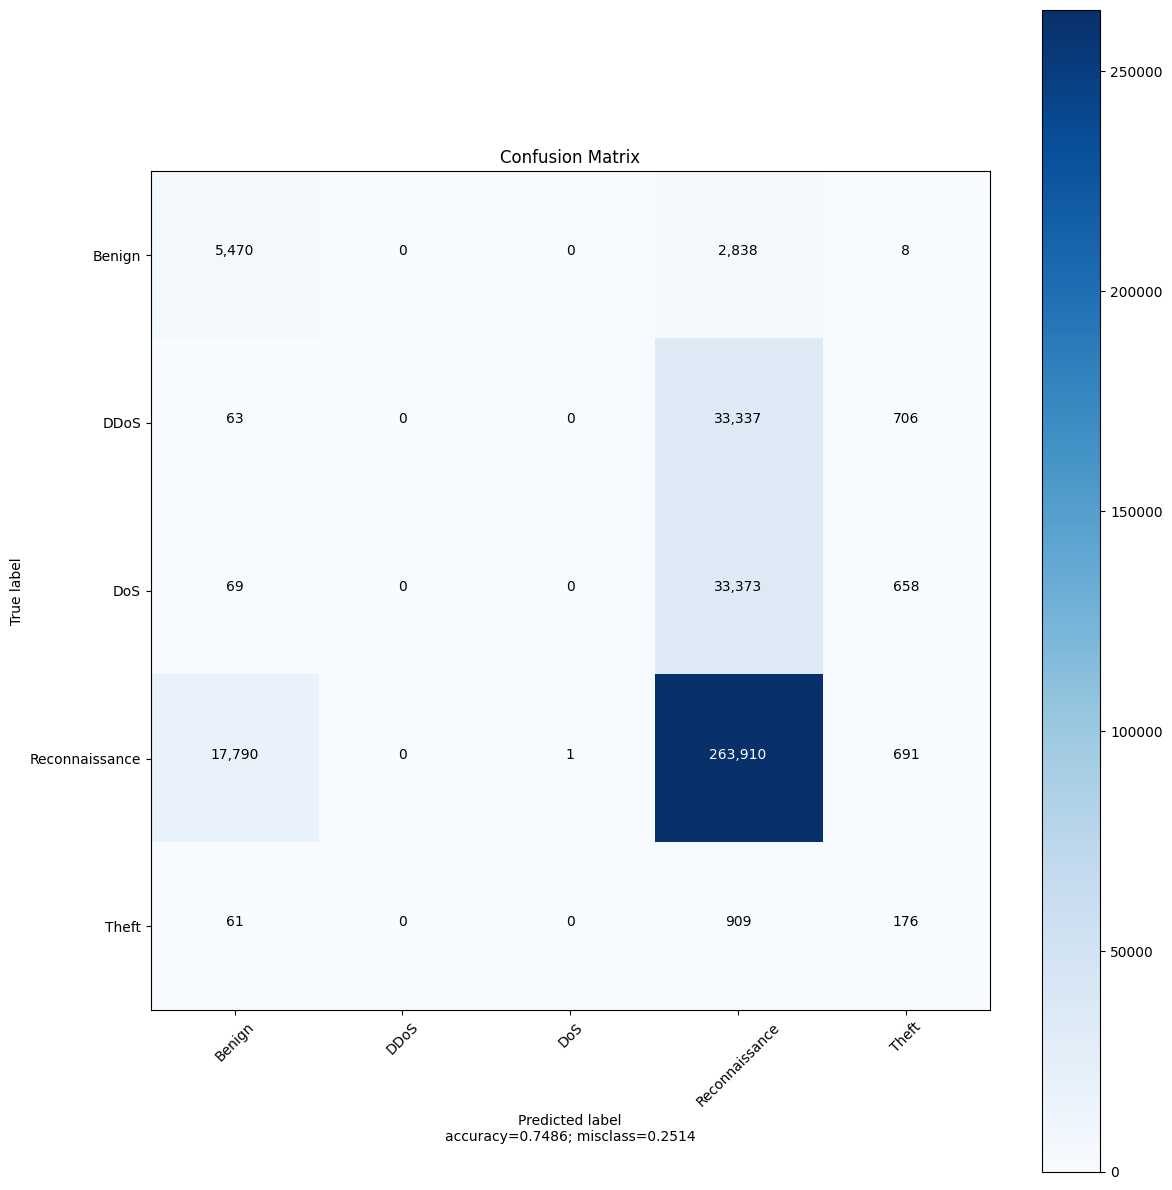

In [59]:
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(cm = confusion_matrix(actual, test_pred), 
                      normalize    = False,
                      target_names = np.unique(actual),
                      title        = "Confusion Matrix")

In [61]:
# After training
th.save(model.state_dict(), 'new_model.pth')

In [ ]:
# After training
th.save(model.state_dict(), 'new_model.pth')